In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df=df_data_1

In [4]:
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#check for null records
df.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [6]:
#check for duplicate records
df.duplicated().sum()

0

In [80]:
#make a copy of your dataframe before making any changes
df_bike=df.copy()
df_bike.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [81]:
#dropping the index, date ,casual,and registred columns as we don't need them
df_bike.drop(['index','date','casual','registered'],axis=1,inplace=True)

In [82]:
df_bike.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [83]:
df_bike.shape

(17379, 13)

In [84]:
df['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [ ]:
sns.

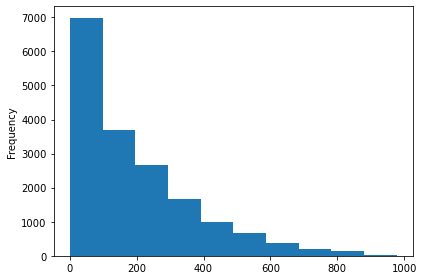

In [12]:

df_bike['demand'].plot(kind='hist')
plt.tight_layout()  #Our target variable is not normaize as you can see from the graph so we have to normalize it before applying ML

In [58]:
df_bike.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

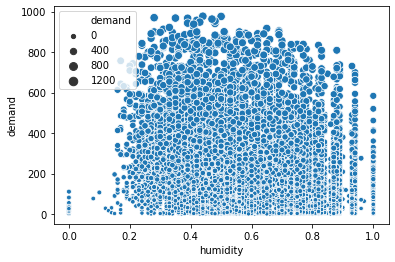

In [13]:
sns.scatterplot('humidity','demand',data=df_bike,size='demand')

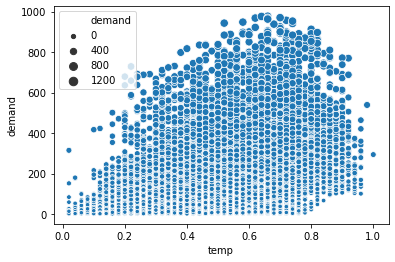

In [14]:
sns.scatterplot('temp','demand',data=df_bike,size='demand')

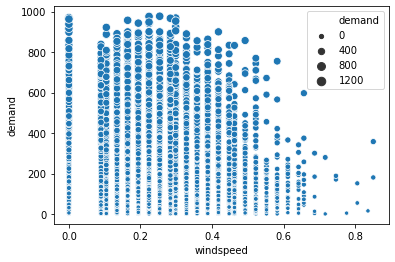

In [68]:
sns.scatterplot('windspeed','demand',data=df_bike,size='demand')

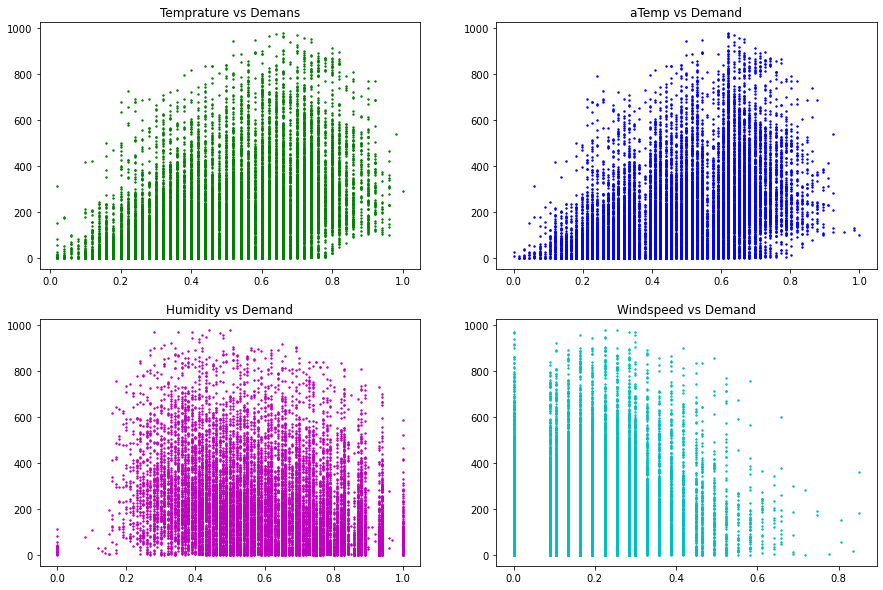

In [15]:
#creating a subplot for camparing
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Temprature vs Demans')
plt.scatter(df_bike['temp'],df_bike['demand'],s=2,c='g')

plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(df_bike['atemp'],df_bike['demand'],s=2,c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(df_bike['humidity'],df_bike['demand'],s=2,c='m')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(df_bike['windspeed'],df_bike['demand'],s=2,c='c')

### Obeservation from Plots

<ol>
    <li>As we can see increase in temprature demand is also increasing.Also Temprature and aTemp graph looks exactly same.So we can drop any of the field either Temp or aTemp.
    <li>There is no change in Humidity vs demand graph.
    <li>Temprature and aTemp graph looks exactly same.So we can drop any of the field either Temp or aTemp.
</ol>

In [17]:
season=df_bike[['season','demand']].groupby('season').mean()

Text(0.5, 1.0, 'Season vs Demand')

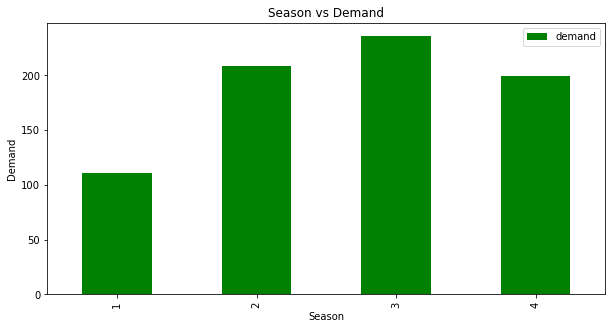

In [23]:
colors=['g','b','c','m']
df_bike[['season','demand']].groupby('season').mean().plot(kind='bar',figsize=(10,5),color=colors)
plt.xlabel('Season')
plt.ylabel('Demand')
plt.title('Season vs Demand')

<or>
    <li>1 for Spring</li>
    <li>2 for Summer</li>
    <li>3 for Fall</li>
    <li>4 for Winter</li>
</or>
<h4>As we can see demand increases during Fall time</h4>

Text(0.5, 1.0, 'Month vs Demand')

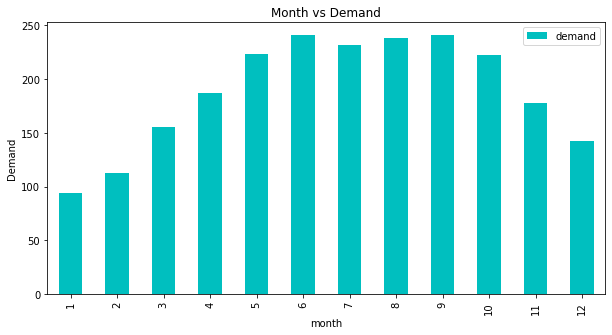

In [26]:
df_bike[['month','demand']].groupby('month').mean().plot(kind='bar',figsize=(10,5),color='c')
plt.xlabel('month')
plt.ylabel('Demand')
plt.title('Month vs Demand')

<li>

In [27]:
df.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

Text(0.5, 1.0, 'holiday vs Demand')

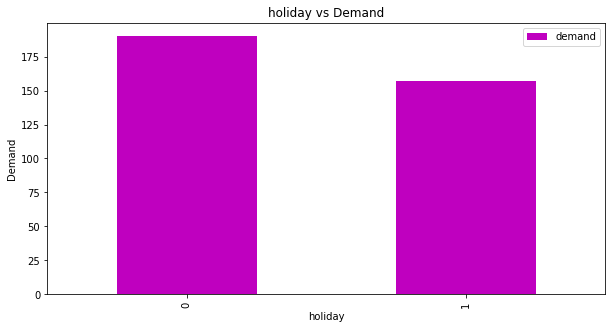

In [28]:
df_bike[['holiday','demand']].groupby('holiday').mean().plot(kind='bar',figsize=(10,5),color='m')
plt.xlabel('holiday')
plt.ylabel('Demand')
plt.title('holiday vs Demand')

<li> There is slight change in data also data is for 2 yers only and we might not know if it is increase in next year or not so we can drop it.

Text(0.5, 1.0, 'weekday vs Demand')

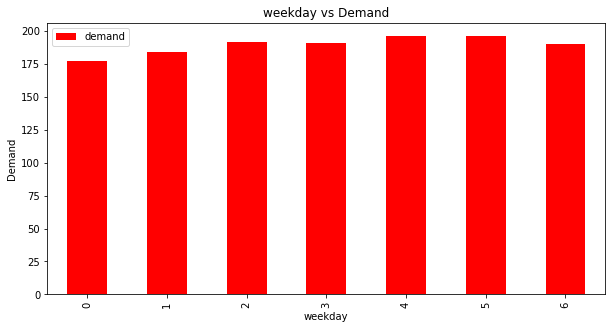

In [39]:
df_bike[['weekday','demand']].groupby('weekday').mean().plot(kind='bar',figsize=(10,5),color='r')
plt.xlabel('weekday')
plt.ylabel('Demand')
plt.title('weekday vs Demand')

<li> There is no change in pattren as it looks almost same for every day,so we can also drop this

Text(0.5, 1.0, 'Hour vs Demand')

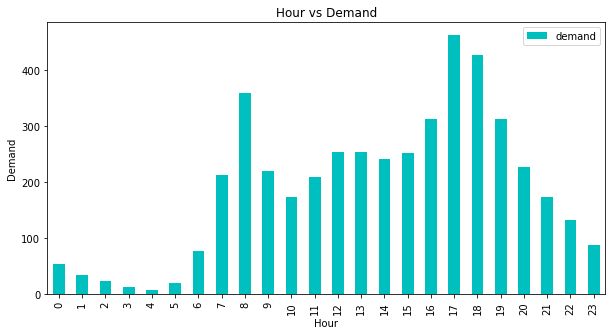

In [9]:
df_bike[['hour','demand']].groupby('hour').mean().plot(kind='bar',figsize=(10,5),color='c')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.title('Hour vs Demand')

<li>Demand increase from 7 AM to 9 AM may be for going to office and again increase from 4 PM to 8 PM (coming from office)

Text(0.5, 1.0, 'weather vs Demand')

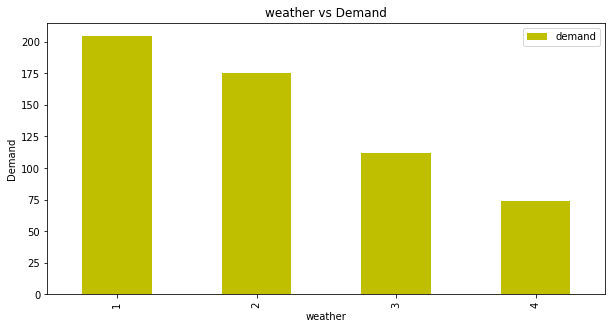

In [7]:
df_bike[['weather','demand']].groupby('weather').mean().plot(kind='bar',figsize=(10,5),color='y')
plt.xlabel('weather')
plt.ylabel('Demand')
plt.title('weather vs Demand')

In [85]:
#checking for multiple Linear Assumption
df_bike[['atemp','temp','humidity','windspeed','demand']].corr()

,atemp,temp,humidity,windspeed,demand
atemp,1.000000,0.987672,-0.051918,-0.062336,0.400929
temp,0.987672,1.000000,-0.069881,-0.023125,0.404772
humidity,-0.051918,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.062336,-0.023125,-0.290105,1.000000,0.093234
demand,0.400929,0.404772,-0.322911,0.093234,1.000000


<ol>
    <li>As we can see correlation of atem and Temp is almost same so we can drop atemp variable.</li>
    <li>Also there is no correlation(low corr value) between windspeed and demand,so we can drop it too.</li>
</ol>

In [86]:
#dropping not requried variable
df_bike.drop(['atemp','windspeed','weekday','year','workingday'],axis=1,inplace=True)

In [87]:
df_bike.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [55]:
df_bike.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand        int64
dtype: object

#### To plot autocorrelation graph variable shoud be of float type ,so we have to convert deman type from int64 to float type 

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.87978956, 0.88067058, 0.88281834, 0.88769913, 0.89594009,
        0.90754072, 0.92387399, 0.94539465, 0.96914284, 0.98933163,
        1.        , 0.98933163, 0.96914284, 0.94539465, 0.92387399,
        0.90754072, 0.89594009, 0.88769913, 0.88281834, 0.88067058,
        0.87978956]),
 <matplotlib.lines.Line2D at 0x7fcfde87a090>)

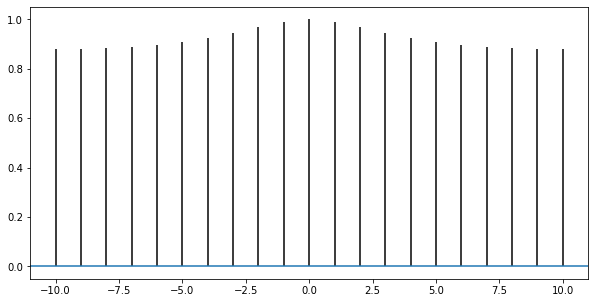

In [89]:
plt.figure(figsize=(10,5))
plt.acorr(df_bike['demand'].astype('float'))

In [ ]:
df_bike['demand']=np.log(df_bike['demand'])
df_bike.head()

In [90]:
#there is auto correlation in demand column,so we have to fix this.
t_1=df_bike['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2=df_bike['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

t_3=df_bike['demand'].shift(+3).to_frame()
t_3.columns=['t-3']
print('Success')

Success


In [91]:
#next we have to add these columns to original dataframe
df_bike=pd.concat([df_bike,t_1,t_2,t_3],axis=1)
df_bike.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [92]:
#dropping the na values
df_bike.dropna(inplace=True)
df_bike.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [25]:
df_bike.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
dtype: object

In [93]:
#changing type int64 to type category
columns=['season','month','hour','holiday','weather']
for c in columns:
    df_bike[c]=df_bike[c].astype('category')
print('Success!!')

Success!!


In [94]:
df_bike.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [95]:
df_bike=pd.get_dummies(df_bike,drop_first=True)
df_bike.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df_bike.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
x=df_bike.drop(['demand'],axis=1)
y=df_bike['demand']
x.head()

,temp,humidity,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,3.465736,3.688879,2.772589,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,2.564949,3.465736,3.688879,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,2.564949,3.465736,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.000000,0.000000,2.564949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,0.693147,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#splitting the data inot train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('Training size:{}'.format(x_train.shape))
print('Test size:{}'.format(x_test.shape))

Training size:(13900, 46)
Test size:(3476, 46)


### Since the target variable 'demand' is a continous variable so to predict continuous variable we have to use LinearRegression Model

In [98]:
#fitting the train data 
lr=LinearRegression()
lr.fit(x_train,y_train)

#making prediction using test data
y_pr=lr.predict(x_test)
y_pr[0:5]

array([4.86770846, 3.18435646, 5.05093743, 6.44530762, 6.28015243])

In [104]:
#calculating the RMSE and Accuracy
from sklearn.metrics import mean_squared_error
msr=mean_squared_error(y_test,y_pr)
print('RSME is:{}'.format(np.sqrt(msr)))
print('Score is:{}'.format(lr.score(x_test,y_test)))

RSME is:0.4090055390480241
Score is:0.9256722792930792


# Conclusion
### As Score is 0.92 which is close to 1 so we can say our model is making <b style='color:green'>GOOD Prediction</b>.
### Also RSME is not high (0.40) which is good.

In [119]:
y_true=pd.DataFrame(y_pr)
y_true.columns=['Demand']
Y=pd.concat([x_test,y_true],axis=1)
Y.head()

,temp,humidity,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4,Demand
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.867708
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.184356
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.050937
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.445308
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.280152


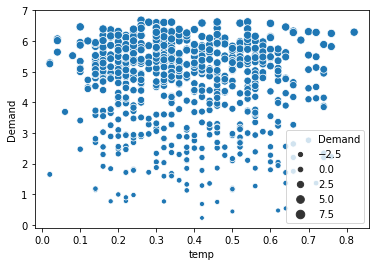

In [149]:
#y=pd.concat([x_test[list(x_test.columns[:-1])],y_true['demand']]).plot(kind='scatter')
sns.scatterplot(x=Y['temp'],y=Y['Demand'],data=Y,size='Demand')

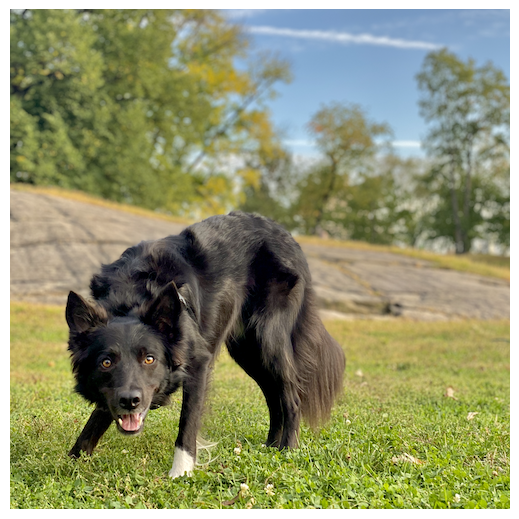

In [146]:
#y=pd.concat([x_test[list(x_test.columns[:-1])],y_true['demand']]).plot(kind='scatter')
sns.dogplot(x=Y['temp'],y=Y['Demand'],data=Y,size=7)